In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

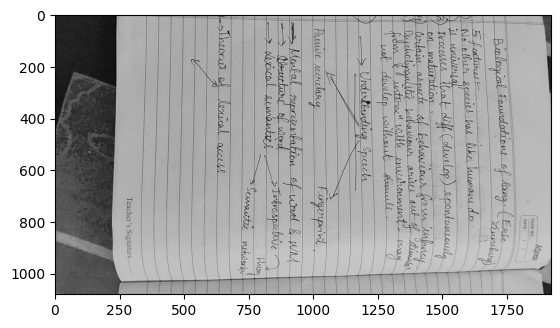

In [189]:
# Read the image
image_path = 'C:\\Users\\User\\Downloads\\TheAware.AI\\keyframes_new_3\\KeyFrame_7.jpg'
image = cv2.imread(image_path)
plt.imshow(image)

In [190]:
# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)  # You can adjust the threshold values based on your image

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

# Apply Canny edge detection
edges = cv2.Canny(image, 50, 150)

# Apply dilation and erosion
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=2)

<Figure size 1000x500 with 0 Axes>

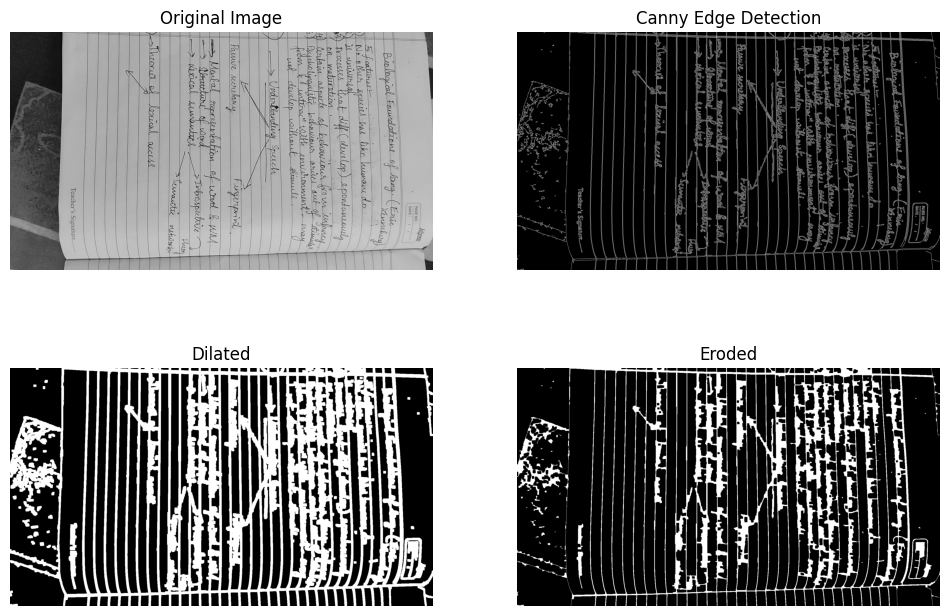

In [178]:



# Display the original, Canny, dilated, and eroded images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')
plt.axis('off')

plt.show()

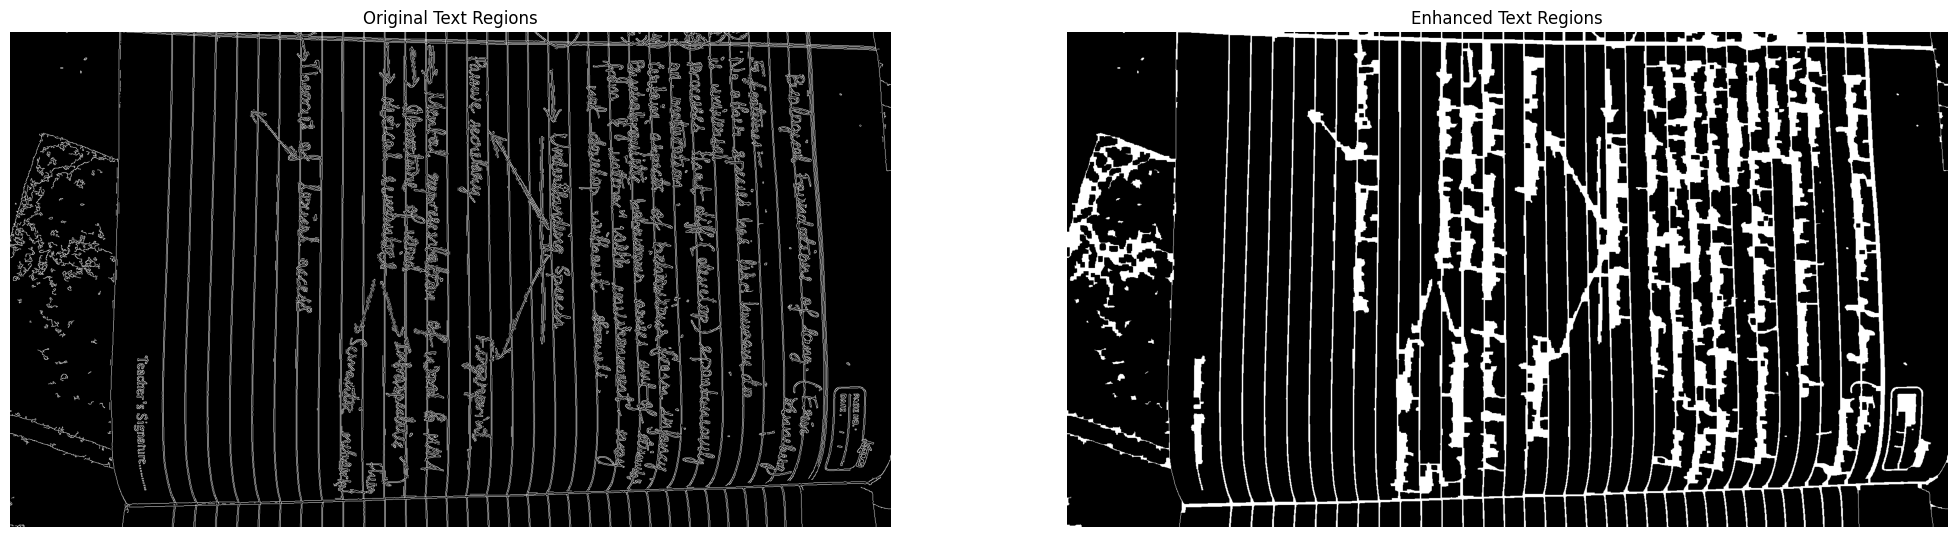

In [179]:
# Apply dilation to enhance white regions
kernel = np.ones((10, 10), np.uint8)
enhanced_text_regions = cv2.dilate(edges, kernel, iterations=1)

# Display the original and enhanced text regions
plt.figure(figsize=(25, 20))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Original Text Regions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Enhanced Text Regions')
plt.axis('off')

plt.show()

In [180]:
import cv2
import numpy as np

def calculate_area_ratio(binary_image):



    # Calculate the area of the white region (white pixels)
    white_area = np.sum(binary_image == 255)

    # Calculate the area of the black region (black pixels)
    black_area = np.sum(binary_image == 0)

    # Calculate the area ratio (white_area / black_area)
    area_ratio = white_area / black_area if black_area != 0 else float('inf')

    print(f"White Area: {white_area} pixels")
    print(f"Black Area: {black_area} pixels")
    print(f"Area Ratio (White / Black): {area_ratio:.4f}")

# Example usage
binary_image_path = eroded
calculate_area_ratio(binary_image_path)


White Area: 397214 pixels
Black Area: 1676386 pixels
Area Ratio (White / Black): 0.2369


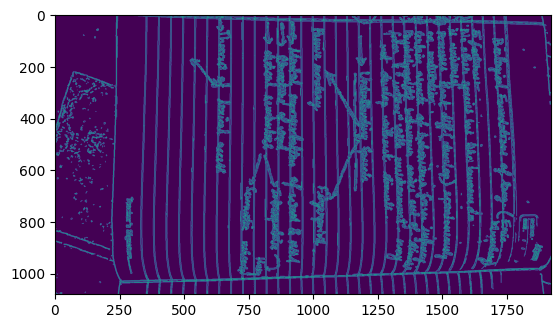

In [181]:
# Apply Sobel operator for vertical gradient
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0,1 , ksize=1)
sobel_x=cv2.Sobel(image, cv2.CV_64F, 1,0 , ksize=1)
# Convert the result to absolute values
sobel_y = np.abs(sobel_y)
sobel_x = np.abs(sobel_x)

# Convert to 8-bit image
sobel_y = np.uint8(sobel_y)
sobel_x = np.uint8(sobel_x)
sobel = sobel_x+sobel_y
# Apply Canny edge detection to the vertical gradient
edges = cv2.Canny(sobel, 90, 150)

plt.imshow(edges)

In [182]:
from importlib import invalidate_caches
from pytesseract import image_to_string

import cv2
import numpy as np
import sys

def remove_horizontal_lines(image):
    # Convert the image to true black and white from grayscale
    threshold, image_bin = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Invert the image to change white to black and vice versa
    image_inv = 255 - image_bin

    # Define kernels for horizontal lines
    kernel_len = np.array(image).shape[1] // 100
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 20))

    # Remove anything that is not a horizontal line
    image_inv = cv2.erode(image_inv, horizontal_kernel, iterations=3)
    horizontal_lines = cv2.dilate(image_inv, horizontal_kernel, iterations=5)

    # Subtract horizontal lines from the original image to remove them
    image_without_horizontal_lines = cv2.subtract(255 * np.ones_like(image), horizontal_lines)

    return image_without_horizontal_lines

new = remove_horizontal_lines(edges)


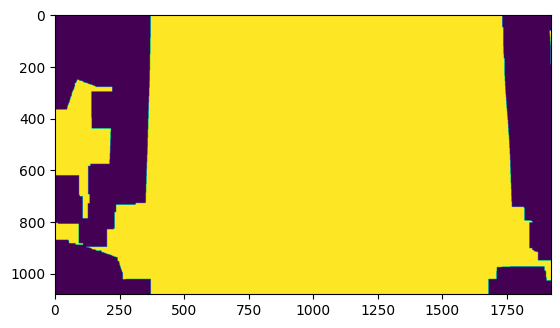

In [183]:
plt.imshow(new)

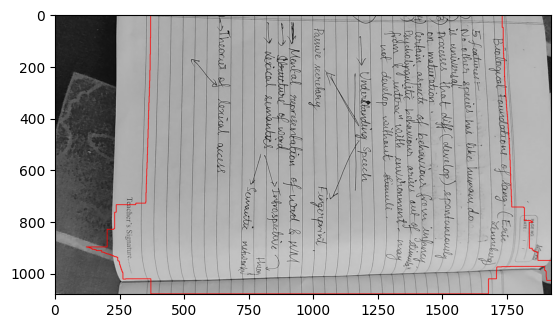

In [184]:
# Find contours in the binary image
contours, _ = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy=image.copy()
    # Sort contours based on their areas in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(image, [contours[0]], -1, 255, 2)
plt.imshow(image)

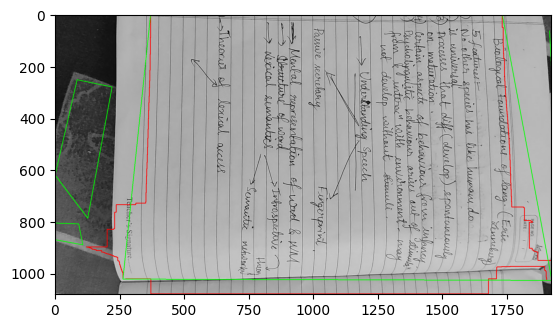

In [185]:
# Iterate over the contours
for contour in contours:
        # Approximate the contour with a polygon (rectangle)
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Draw the approximated polygon on the original image
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

plt.imshow(image)

In [186]:
 # Iterate over the contours
for contour in contours:
        # Find the minimum area rectangle that encloses the contour
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Draw the bounding box on the original image
        cv2.drawContours(image_copy, [box], 0, (0, 255, 0), 2)

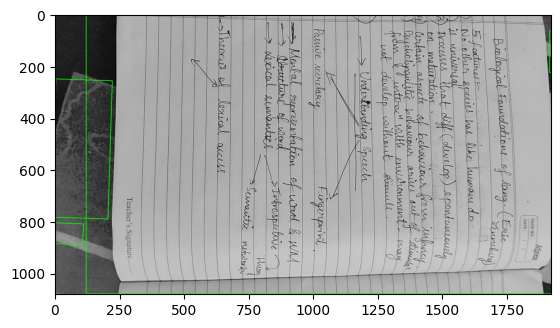

In [187]:
plt.imshow(image_copy)

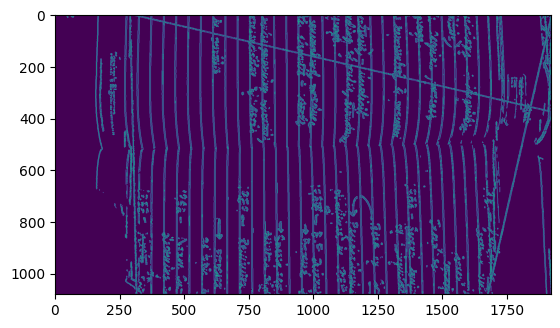

In [115]:
# Apply Sobel operator for vertical gradient
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1,0 , ksize=1)
# Convert the result to absolute values
sobel_y = np.abs(sobel_y)

# Convert to 8-bit image
sobel_y = np.uint8(sobel_y)

# Apply Canny edge detection to the vertical gradient
edges = cv2.Canny(sobel_y, 90, 150)

plt.imshow(edges)